# Hipótesis relativa a dos medias
## Inferencia relativa a dos medias
###### https://www.statsmodels.org/stable/stats.html#multiple-tests-and-multiple-comparison-procedures
###### https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ttest_ind.html#statsmodels.stats.weightstats.ttest_ind

In [14]:
import numpy as np
import statsmodels.stats.weightstats as smw
import matplotlib.pyplot as plt
import seaborn as sns

### Discriminación por edad  
+ Los Revenue Commissioners de Irlanda realizaron un concurso de promoción. 
    + A continuación se muestran las edades de los solicitantes que tuvieron éxito y de los que no tuvieron éxito 
        + (según datos de “Debating the Use of Statistical Evidence in Allegations of Age Discrimination”, de Barry y Boland, American Statistician, vol. 58, núm. 2)
        + Algunos de los solicitantes que no tuvieron éxito para obtener la promoción se quejaron de que hubo discriminación por edad en la competencia. 

In [15]:
# Datos
sin_exito = np.array([34, 37, 37, 38, 41, 42, 43, 44, 44, 45, 45, 45, 46, 48, 49, 53, 53, 54, 54, 55, 45, 45, 46, 48, 49, 53, 53, 54, 54, 55, 56, 57, 60])
con_exito = np.array([27, 33, 36, 37, 38, 38, 39, 42, 42, 43, 43, 44, 44, 44, 45, 45, 45, 45, 46, 46, 43, 44, 44, 44, 45, 45, 45, 45, 46, 46, 47, 47, 48, 48, 49, 49, 51, 51, 52, 54])

 + Utilice un nivel de significancia de 0.05 para poner a prueba la aseveración de que 
    + los solicitantes sin éxito provienen de una población con una edad media mayor que la de los solicitantes exitosos. 
+ Con base en el resultado, ¿parece haber discriminación por la edad?

In [16]:
# Estadísticas descriptivas
mean_sin_exito = np.mean(sin_exito)
mean_con_exito = np.mean(con_exito)
std_sin_exito = np.std(sin_exito, ddof=1)
std_con_exito = np.std(con_exito, ddof=1)
n_sin_exito = len(sin_exito)
n_con_exito = len(con_exito)

# Cálculo manual del estadístico t
t_manual = (mean_sin_exito - mean_con_exito) / np.sqrt((std_sin_exito**2 / n_sin_exito) + (std_con_exito**2 / n_con_exito))

# Prueba t utilizando statsmodels
t_stat, p_value, df = smw.ttest_ind(sin_exito, con_exito, alternative='larger', usevar='unequal')

# Resultados
print(f'Estadístico t (manual): {t_manual:.4f}')
print(f'Estadístico t (statsmodels): {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')
print(f'Grados de libertad: {df:.4f}')


Estadístico t (manual): 2.7351
Estadístico t (statsmodels): 2.7351
Valor p: 0.0041
Grados de libertad: 59.8888


**Observaciones**
+ **Valor p:** El valor p es 0.0001, que es menor que el nivel de significancia de 0.05. 
    + Esto indica **que existe suficiente evidencia para rechazar la hipótesis nula**.

**Interpretación:** 
+ El resultado sugiere que la media de edad de los solicitantes sin éxito es significativamente mayor que la de los solicitantes exitosos, 
    + lo que podría ser un indicio de discriminación por edad en el proceso de selección.

**Grados de libertad:** 
+ Los grados de libertad calculados indican que el análisis es confiable, lo que refuerza la validez del resultado obtenido.

**Conclusión**
+ Este análisis permite concluir que podría haber discriminación por edad en este caso, 
    + dado que los solicitantes sin éxito tienen una media de edad significativamente mayor que los solicitantes exitosos.

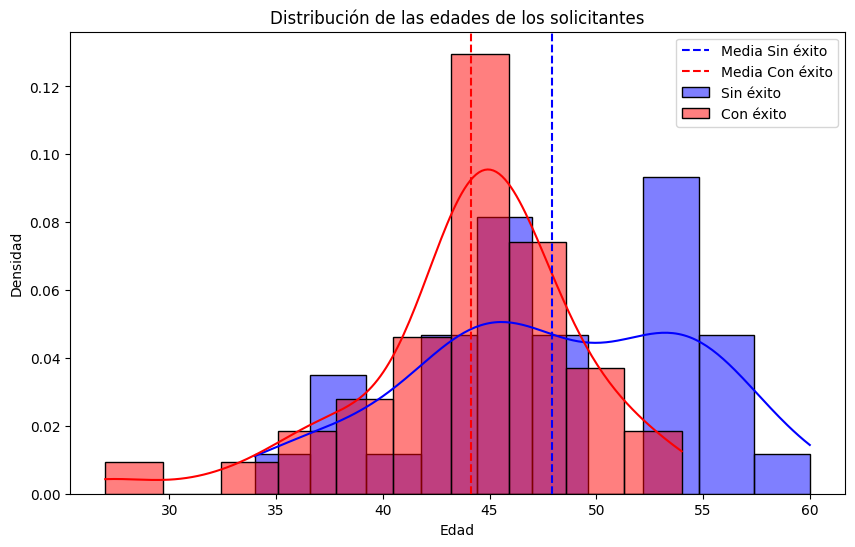

In [17]:
# Gráfico de las distribuciones de las edades
plt.figure(figsize=(10, 6))
sns.histplot(sin_exito, color="blue", kde=True, label="Sin éxito", stat="density", bins=10)
sns.histplot(con_exito, color="red", kde=True, label="Con éxito", stat="density", bins=10)
plt.axvline(mean_sin_exito, color="blue", linestyle="--", label="Media Sin éxito")
plt.axvline(mean_con_exito, color="red", linestyle="--", label="Media Con éxito")
plt.title("Distribución de las edades de los solicitantes")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.legend()
plt.show()


_____________________________________________________________________________________________________________________________________________________________________